In [59]:
# import library
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [60]:
# create dataframe from csv file
data = pd.read_csv('Dataset Beras New Fix.csv', index_col='Tanggal', parse_dates=True)
data.tail(30)

,Premium,Medium
Tanggal,,
2025-01-02,15200.0,12800.0
2025-01-03,15200.0,12800.0
2025-01-04,15200.0,12800.0
2025-01-05,15200.0,12800.0
2025-01-06,15200.0,12800.0
2025-01-07,15200.0,12800.0
2025-01-08,15200.0,12800.0
2025-01-09,15200.0,12800.0
2025-01-10,15200.0,12800.0


<Axes: xlabel='Tanggal'>

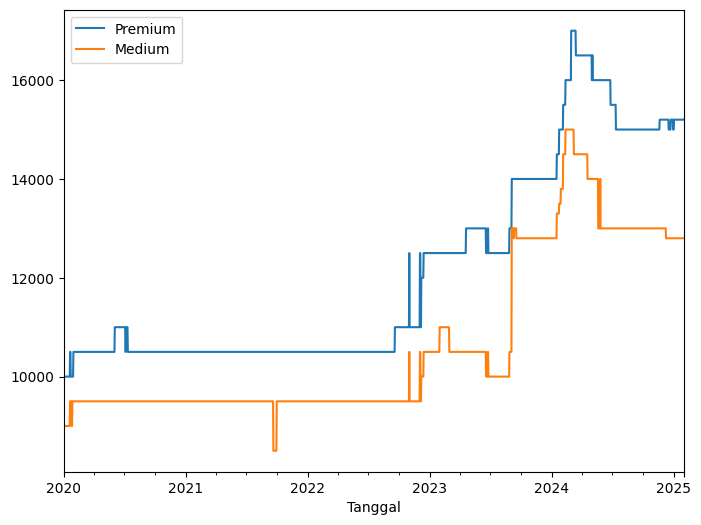

In [61]:
# plot data
data.plot()

In [62]:
# Beras Premium
# Scaling data menggunakan minmax scaller
min_max_scaler = MinMaxScaler(feature_range=(1, 2))
dataset = min_max_scaler.fit_transform(
    data['Premium'].values.reshape(-1, 1)
    )

In [63]:
data_awal = data['Premium'].values.reshape(-1)
data_minmax = dataset.reshape(-1)
# data_predict
new_df = {
    "data asli" : data_awal,
    "min-max": data_minmax
}

dataframe = pd.DataFrame(new_df)
dataframe.sample(10)
# data_minmax

,data asli,min-max
545,10500.0,1.071429
112,10500.0,1.071429
1216,13000.0,1.428571
527,10500.0,1.071429
1230,13000.0,1.428571
1079,12500.0,1.357143
220,10500.0,1.071429
1741,15000.0,1.714286
1771,15000.0,1.714286
900,10500.0,1.071429


In [64]:
# Membuat fungsi window dataset
def windowed_dataset(dataset, window_size=20):
    dataX, dataY = [], []
    for i in range(len(dataset)-window_size-1):
        a = dataset[i:(i+window_size), 0]
        dataX.append(a)
        dataY.append(dataset[i + window_size, 0])
    return np.array(dataX), np.array(dataY)

In [65]:
# Split dataset menjadi data train dan data validasi
train_size = int(len(dataset) * 0.8)
validation_size = len(dataset) - train_size
# Membagi dataset menjadi data latih dan data uji
train, validation = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(validation))

1486 372


In [66]:
# Parameters
window_size = 20

# Membuat window data train dan validation
x_train, y_train = windowed_dataset(train, window_size)
x_validation, y_validation = windowed_dataset(validation, window_size)
x_train[0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.07142857])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

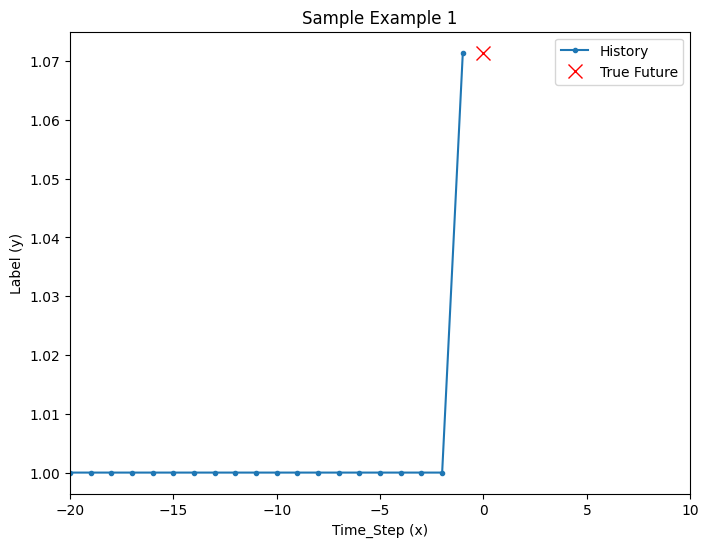

In [67]:
### fucntion to create time steps
def create_time_steps(length):
  return list(range(-length,0))

### function to plot time series data

def plot_time_series(plot_data, delta , title):
  labels = ["History" , 'True Future' , 'Model Predcited']
  marker = ['.-' , 'rx' , 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])

  if delta:
    future = delta
  else:
    future = 0
  plt.title(title)
  for i , x in enumerate(plot_data):
    if i :
      plt.plot(future , plot_data[i] , marker[i], markersize = 10 , label = labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5) *2])

  plt.xlabel('Time_Step (x)')
  plt.ylabel('Label (y)')

  return plt

plot_time_series([x_train[0] , y_train[0]] , 0 , 'Sample Example 1')

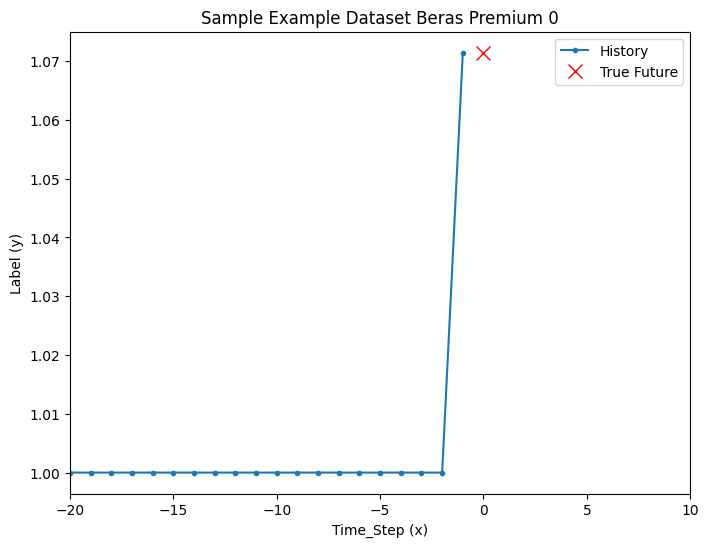

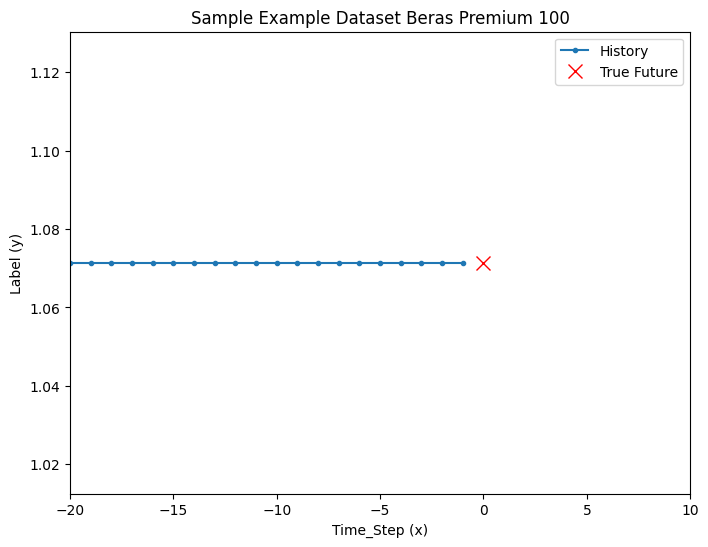

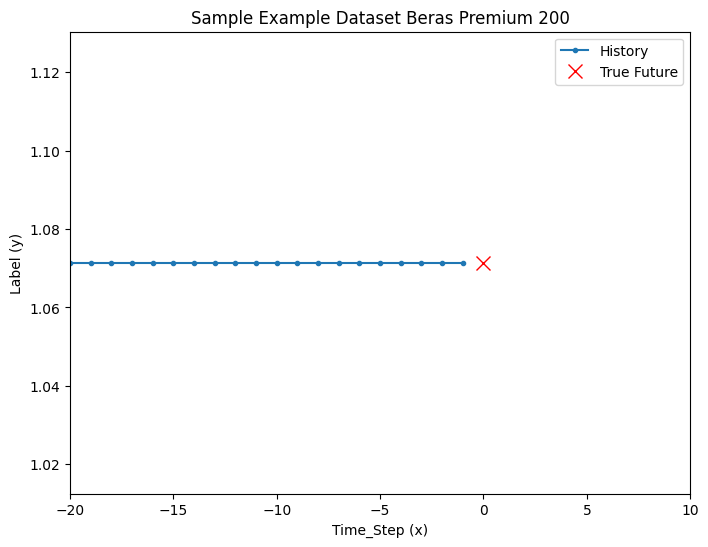

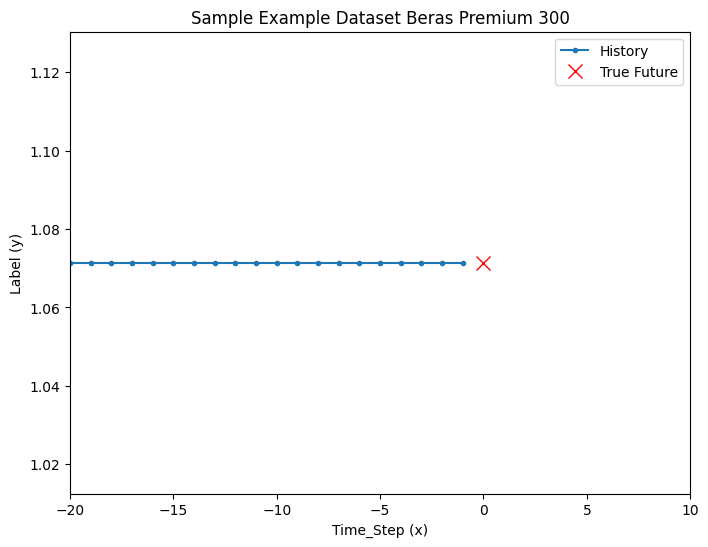

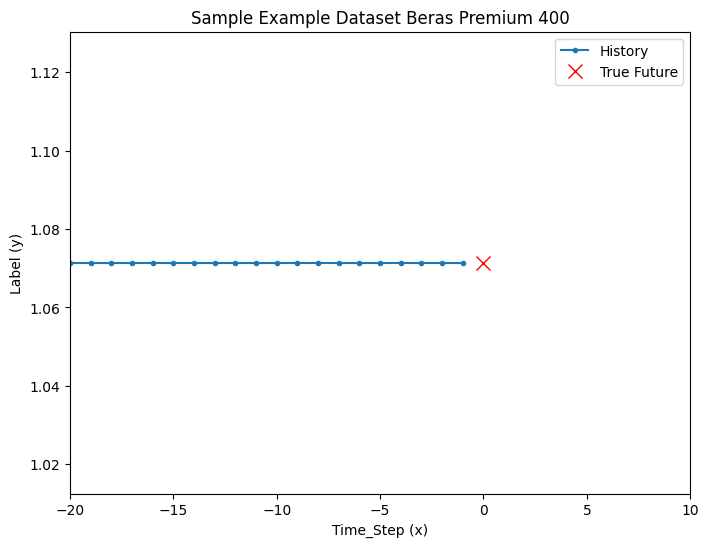

In [68]:
n_data = [0, 100, 200, 300, 400]
for i in n_data:
    plot = plot_time_series([x_train[i] , y_train[i]] , 0 , f'Sample Example Dataset Beras Premium {i}')
    plot.show()

In [69]:
value_train = {}
for i, j in enumerate(x_train[0]):
    value_train[f"x{i+1}"] = [j]

value_train['y'] = y_validation[0]

df_windows = pd.DataFrame(value_train)
df_windows.sample(20, replace=True)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.071429,1.857143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.071429,1.857143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.071429,1.857143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.071429,1.857143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.071429,1.857143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.071429,1.857143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.071429,1.857143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.071429,1.857143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.071429,1.857143
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.071429,1.857143


In [70]:
# cek dimensi data yang sudah dibuat menjadi window dataset
print(f"x train : {x_train.shape}")
print(f"y train : {y_train.shape}")
print(f"x validation : {x_validation.shape}")
print(f"y validation : {y_validation.shape}")

x train : (1465, 20)
y train : (1465,)
x validation : (351, 20)
y validation : (351,)


In [71]:
# reshape data
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_validation = np.reshape(x_validation, (x_validation.shape[0], 1, x_validation.shape[1]))

In [72]:
## prepare tensorflow dataset
batch_size = 256
buffer_size = 10000

train_dataset = tf.data.Dataset.from_tensor_slices((x_train , y_train))
train_dataset = train_dataset.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((x_validation , y_validation))
val_dataset = val_dataset.cache().shuffle(buffer_size).batch(batch_size).repeat()

print(train_dataset)
print(val_dataset)

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 1, 20), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 1, 20), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [73]:
# Perancangan model LSTM menggunakan keras
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.LSTM(40, input_shape=(1, window_size))),
model.add(tf.keras.layers.Dense(1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 40)             │         9,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,801 (38.29 KB)

 Trainable params: 9,801 (38.29 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Menentukan loss dan optimizer training data
optimizer = 'adam'

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Pelatihan model
steps = 200
EPOCHS = 100
history = model.fit(train_dataset , epochs = EPOCHS, steps_per_epoch = steps ,
               validation_data = val_dataset, validation_steps = 50)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2484 - mae: 0.3149 - val_loss: 0.0317 - val_mae: 0.1715
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0064 - val_mae: 0.0713
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4452e-04 - mae: 0.0144 - val_loss: 0.0022 - val_mae: 0.0356
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.4265e-04 - mae: 0.0104 - val_loss: 0.0017 - val_mae: 0.0297
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.3024e-04 - mae: 0.0100 - val_loss: 0.0016 - val_mae: 0.0291
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0338e-04 - mae: 0.0096 - val_loss: 0.0016 - val_mae: 0.0286
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7278e-04 - mae: 0.0093 - val_loss: 0.0015 - val_mae: 0.0276
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3186e-04 - mae: 0.0089 - val_loss: 0.0015 - val_mae: 0.0297
Epoch 9/100
200/200 ━━━━

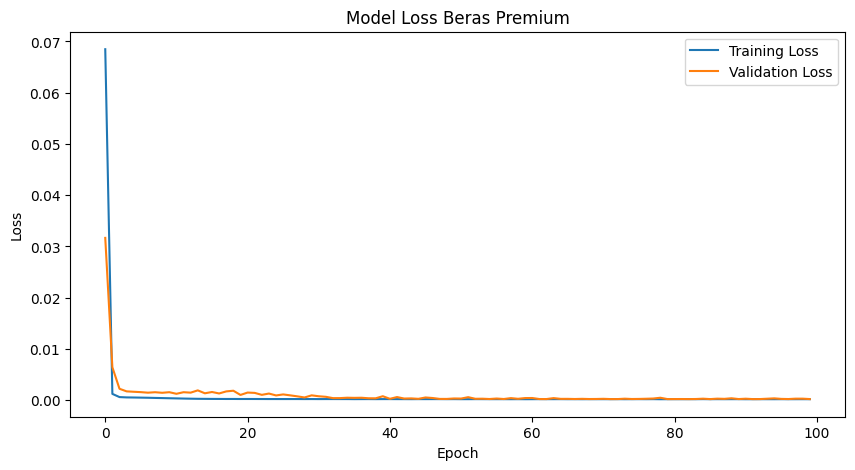

In [75]:
# Plot loss and accuracy selama training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Beras Premium')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_validation)

# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_validation])

# calculate root mean squared error
trainScore = sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 92.77 RMSE
Test Score: 101.61 RMSE


In [77]:
def calculate_mape(actual, predicted) -> float:
  mape = np.mean(np.abs((actual - predicted)/actual))*100
  return mape

In [78]:
# calculate root mean squared error
trainScore = calculate_mape(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore = calculate_mape(testY[0], testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 0.31 MAPE
Test Score: 0.31 MAPE


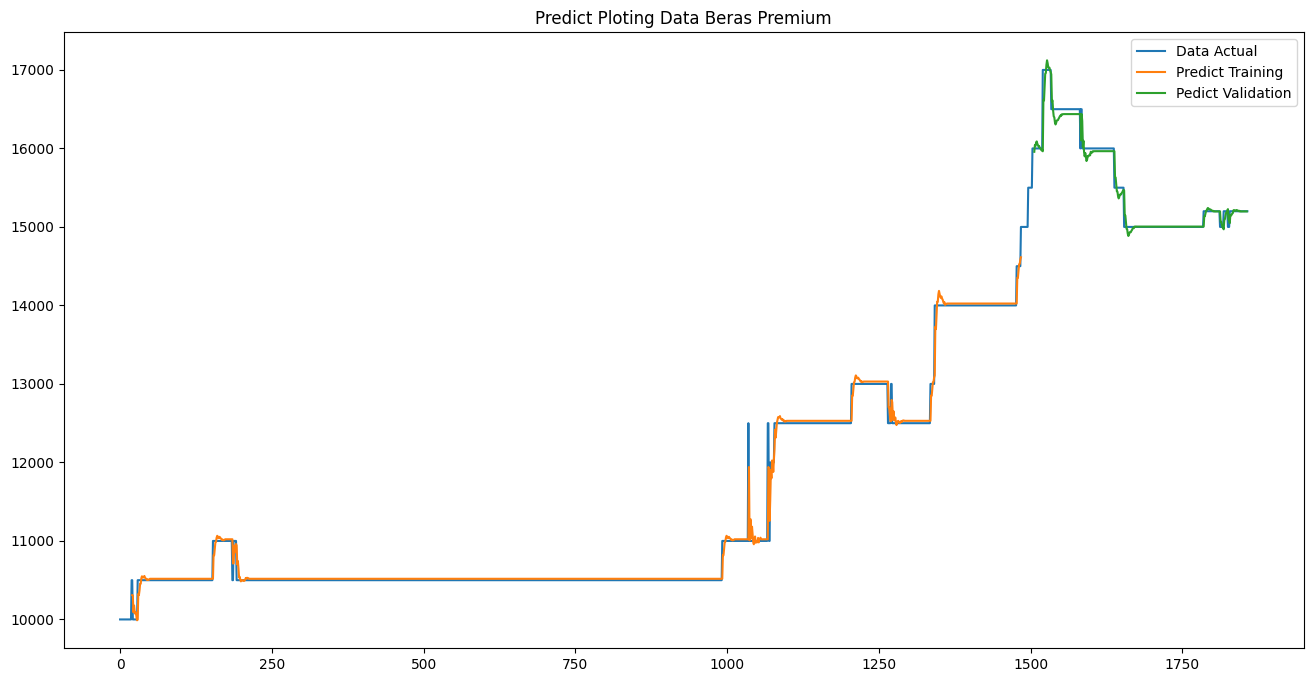

In [79]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(min_max_scaler.inverse_transform(dataset), label='Data Actual')
plt.plot(trainPredictPlot, label='Predict Training')
plt.plot(testPredictPlot, label='Pedict Validation')
plt.title('Predict Ploting Data Beras Premium')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


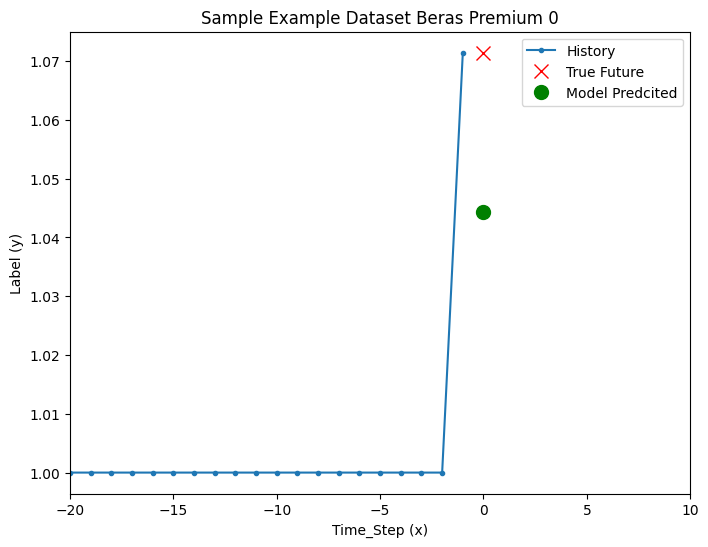

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


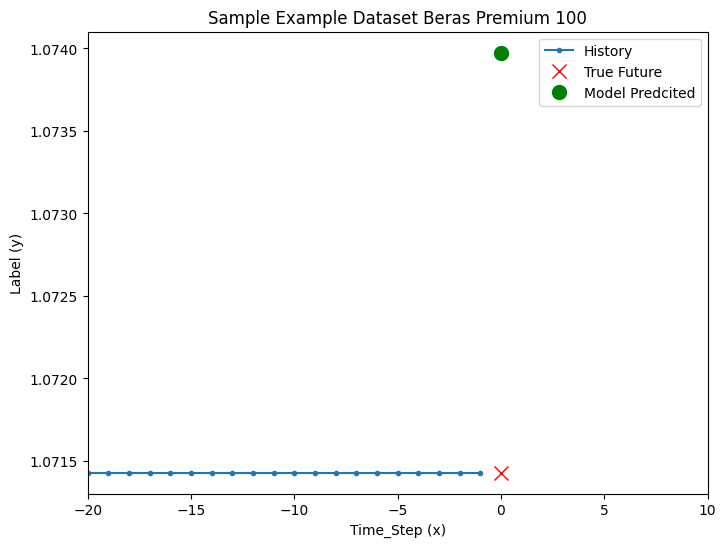

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


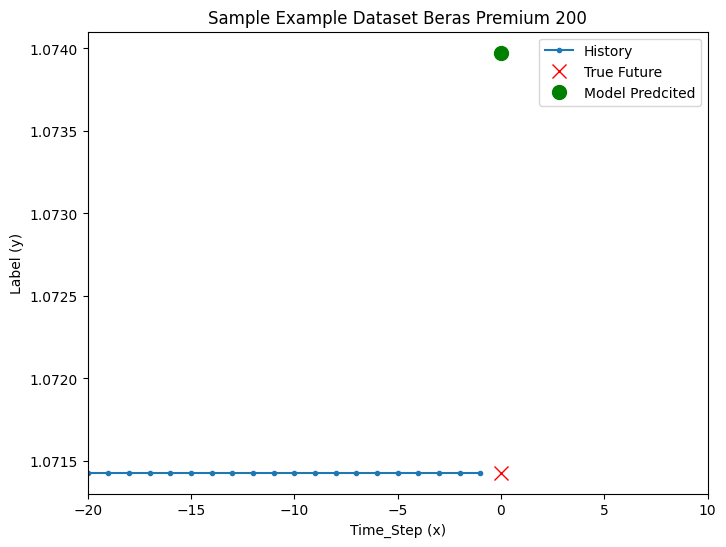

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


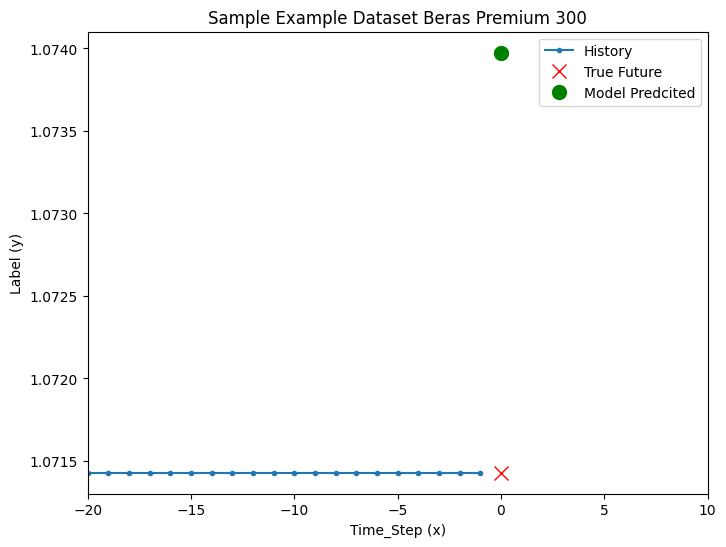

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


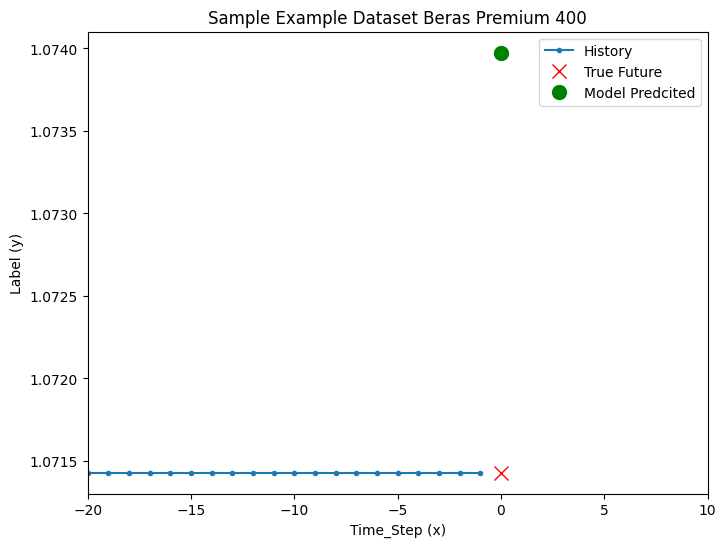

In [80]:
n_data = [0, 100, 200, 300, 400]
for i in n_data:

    dapapred = np.reshape(x_train[i], (x_train[i].shape[0], 1, x_train[i].shape[1]))

    plot = plot_time_series([x_train[i].reshape(-1) , y_train[i], model.predict(dapapred)] , 0 , f'Sample Example Dataset Beras Premium {i}')
    plot.show()

In [81]:
data_awal_predict = dataset[-20:]
data_awal_predict_reshape = np.reshape(data_awal_predict, (data_awal_predict.shape[1], 1, data_awal_predict.shape[0]))
data_awal_predict_reshape.shape

(1, 1, 20)

In [82]:
data_awal = data[window_size:500+window_size]
data_predict = trainPredict[:500]

# data_predict premium
new_df = {
    "Tanggal" : data_awal.index,
    "Harga Aktual" : data_awal['Premium'].values,
    "Harga Prediksi": data_predict.reshape(-1)
}

dataframe = pd.DataFrame(new_df)
dataframe.sample(10)

,Tanggal,Harga Aktual,Harga Prediksi
253,2020-09-30,10500.0,10517.827148
480,2021-05-15,10500.0,10517.827148
458,2021-04-23,10500.0,10517.827148
328,2020-12-14,10500.0,10517.827148
32,2020-02-22,10500.0,10517.827148
74,2020-04-04,10500.0,10517.827148
283,2020-10-30,10500.0,10517.827148
40,2020-03-01,10500.0,10517.827148
43,2020-03-04,10500.0,10517.827148
309,2020-11-25,10500.0,10517.827148


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

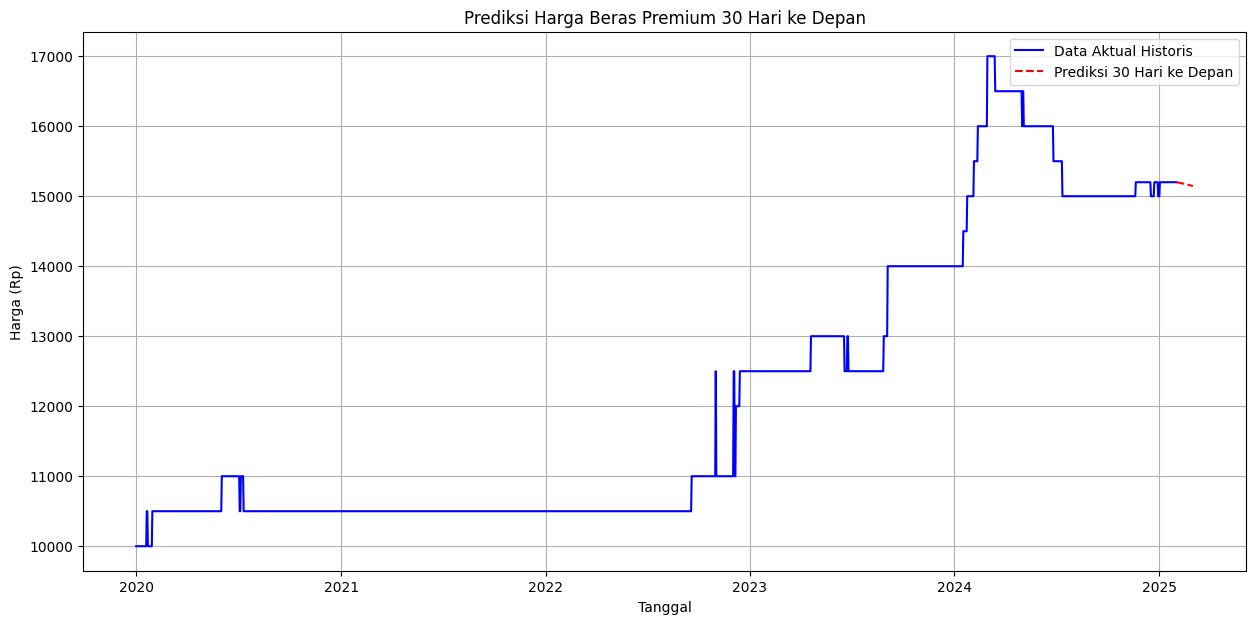

Tabel Prediksi Harga 30 Hari ke Depan:
      Tanggal  Prediksi 30 Hari ke Depan
0  2025-02-01               15197.845101
1  2025-02-02               15196.408987
2  2025-02-03               15195.452690
3  2025-02-04               15194.434643
4  2025-02-05               15193.137884
5  2025-02-06               15191.838622
6  2025-02-07               15190.371633
7  2025-02-08               15188.697696
8  2025-02-09               15187.007904
9  2025-02-10               15185.390711
10 2025-02-11               15183.672547
11 2025-02-12               15181.796670
12 2025-02-13               15179.890752
13 2025-02-14               15177.968144
14 2025-02-15               15176.019669
15 2025-02-16               15174.062014
16 2025-02-17               15172.045946
17 2025-02-18               15170.044899
18 2025-02-19               15168.014646
19 2025-02-20               15165.979385
20 2025-02-21               15163.942456
21 2025-02-22               15161.916375
22 2025-02-23     

In [83]:
# =================================================================================
# KODE UNTUK PREDIKSI 30 HARI KE DEPAN (SUDAH DIPERBAIKI)
# =================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Menentukan jumlah hari untuk prediksi
n_future = 30

# 2. Mengambil data sekuens terakhir dari dataset utama sebagai input awal
#    PERBAIKAN: Menggunakan variabel 'dataset' sesuai notebook Anda
last_sequence = dataset[-window_size:]
current_batch = last_sequence.reshape(1, 1, window_size)

# 3. Looping untuk melakukan prediksi
future_predictions = []
for i in range(n_future):
    # Prediksi 1 hari ke depan
    current_pred = model.predict(current_batch)[0]

    # Simpan hasil prediksi
    future_predictions.append(current_pred)

    # Update batch input: hapus data pertama dan tambahkan hasil prediksi di akhir
    # Reshape current_pred agar sesuai untuk digabungkan
    reshaped_pred = current_pred.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, :, 1:], reshaped_pred, axis=2)


# 4. Mengembalikan hasil prediksi ke skala harga aslinya
#    PERBAIKAN: Menggunakan 'min_max_scaler' sesuai notebook Anda
future_predictions_inversed = min_max_scaler.inverse_transform(future_predictions)

# 5. Membuat rentang tanggal untuk 30 hari ke depan
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future)

# 6. Membuat DataFrame untuk hasil prediksi
df_past = data[['Premium']].reset_index()
df_past.rename(columns={'Tanggal': 'Tanggal', 'Premium': 'Data Aktual'}, inplace=True)

df_future = pd.DataFrame({
    'Tanggal': future_dates,
    'Prediksi 30 Hari ke Depan': future_predictions_inversed.flatten()
})

# 7. Visualisasi hasil
plt.figure(figsize=(15, 7))
plt.plot(df_past['Tanggal'], df_past['Data Aktual'], label='Data Aktual Historis', color='blue')
plt.plot(df_future['Tanggal'], df_future['Prediksi 30 Hari ke Depan'], label='Prediksi 30 Hari ke Depan', color='red', linestyle='--')
plt.title('Prediksi Harga Beras Premium 30 Hari ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga (Rp)')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan tabel hasil prediksi
print("Tabel Prediksi Harga 30 Hari ke Depan:")
print(df_future.to_string())

In [84]:
import pickle
# Beras Premium
# Menyimpan Model Keras ke dalam Format H5
nama_file_model = 'model_prediksi_beras_premium.h5'
model.save(nama_file_model)

print(f"Model berhasil disimpan sebagai '{nama_file_model}'")

# Menyimpan Scaler menggunakan Pickle
nama_file_scaler = 'scaler_premium.pkl'
with open(nama_file_scaler, 'wb') as file:
    pickle.dump(min_max_scaler, file)

print(f"Scaler berhasil disimpan sebagai '{nama_file_scaler}'")

Model berhasil disimpan sebagai 'model_prediksi_beras_premium.h5'
Scaler berhasil disimpan sebagai 'scaler_premium.pkl'
